# Iterative Random Forest Prediction
### Using Bachelorette Data, Predicts the Winner Each Week

In [2]:
# load in libraries
import pandas as pd
import numpy as np
%matplotlib inline
import scipy as sp
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.ensemble as skens
import sklearn.metrics as skmetric
import sklearn.naive_bayes as sknb
import sklearn.tree as sktree
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)
import sklearn.externals.six as sksix
import IPython.display as ipd
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import os

In [3]:
# load in data files
bachelorette = pd.read_csv('bachelorette_forprediction.csv')
sentiment = pd.read_csv('twitterfeatures3.csv')

In [4]:
sentiment.Season.unique()

array([14, 13, 12, 11, 10,  9,  8], dtype=int64)

In [5]:

# take only seasons we have matching data for
#sentiment = sentiment[(sentiment.Season != 13)&(sentiment.Season != 14)].copy()

print(len(sentiment))
print(len(bachelorette))

# merge with bachelorette 
ette_all = bachelorette.merge(sentiment, left_on = ['NAME', 'SEASON'], right_on = ['Name', 'Season'])

print(len(ette_all))

186
316
186


In [6]:
ette_all.SEASON.unique()

array([14, 13, 12, 11, 10,  9,  8], dtype=int64)

In [7]:
ette_all.columns

Index(['Unnamed: 0', 'SHOW', 'SEASON', 'ETTE_NAME', 'CONTESTANT', 'NAME',
       'AGE', 'ELIMINATION-1', 'ELIMINATION-2', 'ELIMINATION-3',
       ...
       '9.0-choose', '9.0-win', 'Age', 'Agreement_1', 'ElimWeek', 'Hometown',
       'Name', 'Occupation', 'Season', 'firstname'],
      dtype='object', length=130)

In [8]:
ette_all = ette_all[['SHOW', 'SEASON', 'ETTE_NAME', 'CONTESTANT', 'NAME',
       'AGE', 'ELIMINATION-1', 'ELIMINATION-2', 'ELIMINATION-3',
       'ELIMINATION-4', 'ELIMINATION-5', 'ELIMINATION-6', 'ELIMINATION-7',
       'ELIMINATION-8', 'ELIMINATION-9', 'ELIMINATION-10', 'DATES-1',
       'DATES-2', 'DATES-3', 'DATES-4', 'DATES-5', 'DATES-6', 'DATES-7',
       'DATES-8', 'DATES-9', 'DATES-10', 'FIR-1', 'FIR-2', 'FIR-3', 'FIR-4',
       'FIR-5', 'FIR-6', 'FIR-7', 'FIR-8', 'FIR-9', 'FIR-10', 'ROSE-1',
       'ROSE-2', 'ROSE-3', 'ROSE-4', 'ROSE-5', 'ROSE-6', 'ROSE-7', 'ROSE-8',
       'ROSE-9', 'ROSE-10', '10.0-Negative', '10.0-Neutral',
       '10.0-Positive', '10.0-Total', '10.0-choose', '10.0-win',
       '11.0-Negative', '11.0-Neutral', '11.0-Positive', '11.0-Total',
       '11.0-choose', '11.0-win', '2.0-Negative', '2.0-Neutral',
       '2.0-Positive', '2.0-Total', '2.0-choose', '2.0-win', '3.0-Negative',
       '3.0-Neutral', '3.0-Positive', '3.0-Total', '3.0-choose', '3.0-win',
       '4.0-Negative', '4.0-Neutral', '4.0-Positive', '4.0-Total',
       '4.0-choose', '4.0-win', '5.0-Negative', '5.0-Neutral', '5.0-Positive',
       '5.0-Total', '5.0-choose', '5.0-win', '6.0-Negative', '6.0-Neutral',
       '6.0-Positive', '6.0-Total', '6.0-choose', '6.0-win', '7.0-Negative',
       '7.0-Neutral', '7.0-Positive', '7.0-Total', '7.0-choose', '7.0-win',
       '8.0-Negative', '8.0-Neutral', '8.0-Positive', '8.0-Total',
       '8.0-choose', '8.0-win', '9.0-Negative', '9.0-Neutral', '9.0-Positive',
       '9.0-Total', '9.0-choose', '9.0-win', 'AGE_DIFF', 'AGE_DIFF_MEAN_POOL', 'AGE_DIFF_CAT',
       'SAME_CITY', 'SAME_STATE', 'SAME_REGION', 'SAME_OCCUPATIONGROUP', 'TOP_THREE',
       'WINNER']].copy()

# '1.0-Negative', '1.0-Neutral', '1.0-Positive', '1.0-Total', '1.0-choose', '1.0-win',

In [9]:
ette_all.dtypes

SHOW                     object
SEASON                    int64
ETTE_NAME                object
CONTESTANT               object
NAME                     object
AGE                       int64
ELIMINATION-1            object
ELIMINATION-2            object
ELIMINATION-3            object
ELIMINATION-4            object
ELIMINATION-5            object
ELIMINATION-6            object
ELIMINATION-7            object
ELIMINATION-8            object
ELIMINATION-9            object
ELIMINATION-10           object
DATES-1                   int64
DATES-2                   int64
DATES-3                   int64
DATES-4                   int64
DATES-5                   int64
DATES-6                   int64
DATES-7                   int64
DATES-8                   int64
DATES-9                   int64
DATES-10                  int64
FIR-1                     int64
FIR-2                     int64
FIR-3                     int64
FIR-4                     int64
                         ...   
6.0-Tota

In [10]:
ette_all[['10.0-Negative', '10.0-Neutral',
       '10.0-Positive', '10.0-Total', '10.0-choose', '10.0-win',
       '11.0-Negative', '11.0-Neutral', '11.0-Positive', '11.0-Total',
       '11.0-choose', '11.0-win', '2.0-Negative', '2.0-Neutral',
       '2.0-Positive', '2.0-Total', '2.0-choose', '2.0-win', '3.0-Negative',
       '3.0-Neutral', '3.0-Positive', '3.0-Total', '3.0-choose', '3.0-win',
       '4.0-Negative', '4.0-Neutral', '4.0-Positive', '4.0-Total',
       '4.0-choose', '4.0-win', '5.0-Negative', '5.0-Neutral', '5.0-Positive',
       '5.0-Total', '5.0-choose', '5.0-win', '6.0-Negative', '6.0-Neutral',
       '6.0-Positive', '6.0-Total', '6.0-choose', '6.0-win', '7.0-Negative',
       '7.0-Neutral', '7.0-Positive', '7.0-Total', '7.0-choose', '7.0-win',
       '8.0-Negative', '8.0-Neutral', '8.0-Positive', '8.0-Total',
       '8.0-choose', '8.0-win', '9.0-Negative', '9.0-Neutral', '9.0-Positive',
       '9.0-Total', '9.0-choose', '9.0-win']] = ette_all[['10.0-Negative', '10.0-Neutral',
       '10.0-Positive', '10.0-Total', '10.0-choose', '10.0-win',
       '11.0-Negative', '11.0-Neutral', '11.0-Positive', '11.0-Total',
       '11.0-choose', '11.0-win', '2.0-Negative', '2.0-Neutral',
       '2.0-Positive', '2.0-Total', '2.0-choose', '2.0-win', '3.0-Negative',
       '3.0-Neutral', '3.0-Positive', '3.0-Total', '3.0-choose', '3.0-win',
       '4.0-Negative', '4.0-Neutral', '4.0-Positive', '4.0-Total',
       '4.0-choose', '4.0-win', '5.0-Negative', '5.0-Neutral', '5.0-Positive',
       '5.0-Total', '5.0-choose', '5.0-win', '6.0-Negative', '6.0-Neutral',
       '6.0-Positive', '6.0-Total', '6.0-choose', '6.0-win', '7.0-Negative',
       '7.0-Neutral', '7.0-Positive', '7.0-Total', '7.0-choose', '7.0-win',
       '8.0-Negative', '8.0-Neutral', '8.0-Positive', '8.0-Total',
       '8.0-choose', '8.0-win', '9.0-Negative', '9.0-Neutral', '9.0-Positive',
       '9.0-Total', '9.0-choose', '9.0-win']].fillna(0)

#'1.0-Negative', '1.0-Neutral', '1.0-Positive', '1.0-Total','1.0-choose', '1.0-win'
# '1.0-Negative', '1.0-Neutral', '1.0-Positive', '1.0-Total','1.0-choose', '1.0-win',

In [23]:
# newvarhead == the main variable name you want the past variable to have
# full_set == the data table used for the alterations
# refvarhead == the variable ending used to make the past variable

def past_current(newvarhead, full_set, refvarhead):
    n = 3
    while n < 12: 
        new_var = newvarhead + str(n + 1)
        previous_var = newvarhead + str(n)
        if n == 3: # this is the beginning
            full_set[new_var] = (full_set['2' + refvarhead] + full_set[('3' + refvarhead)]) / 2
            #print(n)
            #print(new_var)
        else: 
            #print(n)
            #print(new_var)
            #print(previous_var)
            
            reference = str(n) + refvarhead
            full_set[new_var] = (full_set[previous_var] + full_set[reference]) / 2
            #print(reference)
        n = n + 1
    return(full_set)

In [24]:
ette_all = past_current('PAST_POS_', ette_all, ".0-Positive")
ette_all = past_current('PAST_NEG_', ette_all, ".0-Negative")
ette_all = past_current('PAST_NEU_', ette_all, ".0-Neutral")
ette_all = past_current('PAST_TOT_', ette_all, ".0-Total")
ette_all = past_current('PAST_WIN_', ette_all, ".0-win")
ette_all = past_current('PAST_CHOOSE_', ette_all, ".0-choose")

In [1]:
#n = 3
#while n < 12: 
#    new_var = 'PAST_POS_' + str(n + 1)
#    previous_var = 'PAST_POS_' + str(n - 1)
#    if n == 3: 
#        ette_all[new_var] = (ette_all['2.0-Positive'] + ette_all['3.0-Positive'])/2
#        print(n)
#        print(new_var)
#    else: 
#        reference = str(n) + ".0-Positive"
#        ette_all[new_var] = (ette_all[previous_var] + ette_all[reference])/2
#        print(n)
#        print(new_var)
#        print(previous_var)
#        print(reference)
        
#    n = n + 1

#ette_all

In [25]:
def weighting(data_set, current_week, varlist):
    n = 1
    
    #print(current_week)
    while current_week > 0: 
        varcount = 0
        for each in varlist: 
            if varcount < 3: 
                varuse = each + str(current_week)
                data_set[varuse] = data_set[varuse] * n
            else: 
                varuse = str(current_week + 1) + each
                data_set[varuse] = data_set[varuse] * n
            varcount = varcount + 1
            
        current_week = current_week - 1
        n = n - 0.1
    
    return(data_set)
        

## Prediction System

In [41]:

# weighting choice - 1 = do weights, 0 = don't
# wtc = 0 = WINNER, 1 = Top 3
# senti = 0 = no sentiment, 1 = use sentiment
# comb = 0 then full set, 1 = past/current
def prediction_system(test_bach, train_bach, weighting_choice, wtc, senti, comb):
    week = 1
    
    if wtc == 0: 
        # 'Occupation', 'Agreement_1', 'Hometown'
        vars_to_use = ['WINNER', 'NAME', 'AGE', 'AGE_DIFF_CAT', 'SAME_STATE', 'SAME_REGION', 'SAME_OCCUPATIONGROUP'] ### will need  to add other relevant predictor variables 
        keep_set = test_bach[['NAME', 'WINNER']].copy()
    if wtc == 1: 
        vars_to_use = ['TOP_THREE', 'NAME', 'AGE', 'AGE_DIFF_CAT', 'SAME_STATE', 'SAME_REGION', 'SAME_OCCUPATIONGROUP']
        keep_set = test_bach[['NAME', 'TOP_THREE']].copy()
        
        
    while week <= 10: # ten weeks of data available

        fir = 'FIR-'
        rose = 'ROSE-'
        dates = 'DATES-'
        if senti == 1:
            neg = '.0-Negative'
            pos = '.0-Positive'
            neu = '.0-Neutral'
            tot = '.0-Total'
            choose = '.0-choose'
            win = '.0-win'
            sentis = [neg, pos, neu, tot, choose, win]
        if comb == 1: 
            pastneg = 'PAST_NEG_'
            pastpos = 'PAST_POS_'
            pastneu = 'PAST_NEU_'
            pasttot = 'PAST_TOT_'
            pastchoose = 'PAST_CHOOSE_'
            pastwin = 'PAST_WIN_'
            pasts = [pastneg, pastpos, pastneu, pasttot, pastchoose, pastwin]

        if senti == 1: 
            varlist = [fir, rose, dates, neg, pos, neu, tot, choose, win]
        if senti == 0: 
            varlist = [fir, rose, dates]

        new_var = fir + str(week)
        vars_to_use.append(new_var)

        new_var2 = rose + str(week)
        vars_to_use.append(new_var2)

        new_var3 = dates + str(week)
        vars_to_use.append(new_var3)
        
        if senti == 1 and comb == 0: 
            new_var4 = str(week + 1) + neg
            vars_to_use.append(new_var4)

            new_var5 = str(week + 1) + pos 
            vars_to_use.append(new_var5)

            new_var6 = str(week + 1) + neu
            vars_to_use.append(new_var6)

            new_var7 = str(week + 1) + tot 
            vars_to_use.append(new_var7)

            new_var8 = str(week + 1) + choose 
            vars_to_use.append(new_var8)

            new_var9 = str(week + 1) + win 
            vars_to_use.append(new_var9)
            
            
        if senti == 1 and comb == 1 and week <= 2: 
            # add in current week numbers
            # remove past weeks
            # include PASTs
            
            for each in sentis: 
                
                new_var4 = str(week + 1) + each
                vars_to_use.append(new_var4)
                    
        if senti == 1 and comb == 1 and week == 3: 
            # add in current week numbers
            # remove past weeks
            # include PASTs
            
            for each in sentis: 
                
                new_var4 = str(week + 1) + each
                vars_to_use.append(new_var4)
                
                new_var4 = str(week) + each
                vars_to_use.remove(new_var4)
            
                new_var4 = str(week - 1) + each
                vars_to_use.remove(new_var4)
            
            for each in pasts: 
                new_var4 = each + str(week + 1) 
                vars_to_use.append(new_var4)
                
                #if week > 3: 
                #    new_var4 = each + str(week - 1)
                #    vars_to_use.remove(new_var4)
                    
            
        if senti == 1 and comb == 1 and week > 3: 
            # add in current week numbers
            # remove past weeks
            # include PASTs
            
            for each in sentis: 
                
                new_var4 = str(week + 1) + each
                vars_to_use.append(new_var4)
                
                new_var4 = str(week) + each
                vars_to_use.remove(new_var4)
            
                #new_var4 = str(week - 1) + each
                #vars_to_use.remove(new_var4)
            
            for each in pasts: 
                new_var4 = each + str(week + 1) 
                vars_to_use.append(new_var4)
                
                
                new_var4 = each + str(week)
                vars_to_use.remove(new_var4)
            

        # create model
        rf_model = skens.RandomForestClassifier(n_estimators=1000,oob_score=True, criterion='entropy')

        # train on correct variables based on week
        ### need 'WINNER' binary as right/wrong
        this_train = train_bach[vars_to_use].copy()
        if weighting == 1: 
            this_train = weighting(this_train, week, varlist)
        print(week)
        print(vars_to_use)

        # train model on our train set
        if wtc == 0: 
            rf_model.fit(this_train[vars_to_use[2:]], this_train.WINNER)
        if wtc == 1: 
            rf_model.fit(this_train[vars_to_use[2:]], this_train.TOP_THREE)
            
        # set up test set
        this_test = test_bach[vars_to_use].copy()
        if weighting == 1:
            this_test = weighting(this_test, week, varlist)

        # test on correct variables based on week
        # hide winners
        predicted_labels = rf_model.predict(this_test[vars_to_use[2:]])

        # add in predictions
        pred_week = 'PREDICTED' + str(week)
        this_test[pred_week] = predicted_labels
        if wtc == 0:
            to_output = this_test[['NAME', 'WINNER', pred_week]].copy()
            keep_set = keep_set.merge(to_output, on = ['NAME', 'WINNER'], how = 'left')
        if wtc == 1: 
            to_output = this_test[['NAME', 'TOP_THREE', pred_week]].copy()
            keep_set = keep_set.merge(to_output, on = ['NAME', 'TOP_THREE'], how = 'left')
            
        # remove contestants based on ELIMINATION
        e_week_name = 'ELIMINATION-' + str(week)

        # keep them if their elimination value is null or is R (rose)
        test_bach = test_bach[(test_bach[e_week_name].isnull()) | (test_bach[e_week_name] == 'R') | (test_bach[e_week_name] == 'R1')]
        train_bach = train_bach[(train_bach[e_week_name].isnull()) | (train_bach[e_week_name] == 'R') | (train_bach[e_week_name] == 'R1')]
        #print(len(test_bach))
        #print(len(train_bach))

        # increment time
        week = week + 1
        
    return(keep_set)


In [27]:
# accuracy = (true positive + true negative) / total examples
# true positive = WINNER == 1 and PREDICTED == 1
# true negative = WINNER == 0 and PREDICTED == 0
# total examples = count(PREDICTED)
# wtc = 0 = WINNER, 1 = Top 3

def metric_calc(keep_set, wtc):
    week = 1
    metrics = {}
    
    if wtc == 0: 
        vari = 'WINNER'
    if wtc == 1: 
        vari = 'TOP_THREE'
        
    while week <= 10:
        tp = 'TRUE_POSITIVE_' + str(week)
        tn = 'TRUE_NEGATIVE_' + str(week)
        fp = 'FALSE_POSITIVE_' + str(week)
        fn = 'FALSE_NEGATIVE_' + str(week)
        predict_use = 'PREDICTED' + str(week)
        keep_set[tp] = np.where((keep_set[vari] == 1) & (keep_set[predict_use] == 1), 1, 0)
        keep_set[tn] = np.where((keep_set[vari] == 0) & (keep_set[predict_use] == 0), 1, 0)
        keep_set[fp] = np.where((keep_set[vari] == 0) & (keep_set[predict_use] == 1), 1, 0)
        keep_set[fn] = np.where((keep_set[vari] == 1) & (keep_set[predict_use] == 0), 1, 0)

        total_examples = keep_set[predict_use].count()

        accuracy = (keep_set[tp].sum() + keep_set[tn].sum()) / total_examples
        accuracy_use = 'ACCURACY_' + str(week)
        metrics[accuracy_use] = accuracy

        precision = keep_set[tp].sum() / (keep_set[tp].sum() + keep_set[fp].sum())
        precision_use = 'PRECISION_' + str(week)
        metrics[precision_use] = precision

        recall = keep_set[tp].sum() / (keep_set[tp].sum() + keep_set[fn].sum())
        recall_use = 'RECALL_' + str(week)
        metrics[recall_use] = recall

        f1 = 2 * ((precision * recall)/(precision + recall))
        f1_use = 'F1_'+ str(week)
        metrics[f1_use] = f1

        week = week + 1

    evaluation = pd.DataFrame(metrics, index=range(len(metrics)))
    evaluation = pd.DataFrame(evaluation.iloc[0])
    evaluation['Category'] = evaluation.index
    evaluation[['Metric', 'Week']] = evaluation['Category'].str.split('_',expand=True)
    evaluation = evaluation[['Metric', 'Week', 0]]
    evaluation.columns = ['Metric', 'Week', 'Value']
    
    return(evaluation)


In [42]:
# weighting choice - 1 = do weights, 0 = don't
# wtc = 0 = WINNER, 1 = Top 3
# senti = 0 = no sentiment, 1 = use sentiment
#def prediction_system(test_bach, train_bach, weighting_choice, wtc, senti):

test_bach = ette_all[ette_all.SEASON == 14].copy()
train_bach = ette_all[ette_all.SEASON != 14].copy()

keep_set = prediction_system(test_bach, train_bach, 1, 1, 1, 1)

1
['TOP_THREE', 'NAME', 'AGE', 'AGE_DIFF_CAT', 'SAME_STATE', 'SAME_REGION', 'SAME_OCCUPATIONGROUP', 'FIR-1', 'ROSE-1', 'DATES-1', '2.0-Negative', '2.0-Positive', '2.0-Neutral', '2.0-Total', '2.0-choose', '2.0-win']
2
['TOP_THREE', 'NAME', 'AGE', 'AGE_DIFF_CAT', 'SAME_STATE', 'SAME_REGION', 'SAME_OCCUPATIONGROUP', 'FIR-1', 'ROSE-1', 'DATES-1', '2.0-Negative', '2.0-Positive', '2.0-Neutral', '2.0-Total', '2.0-choose', '2.0-win', 'FIR-2', 'ROSE-2', 'DATES-2', '3.0-Negative', '3.0-Positive', '3.0-Neutral', '3.0-Total', '3.0-choose', '3.0-win']
3
['TOP_THREE', 'NAME', 'AGE', 'AGE_DIFF_CAT', 'SAME_STATE', 'SAME_REGION', 'SAME_OCCUPATIONGROUP', 'FIR-1', 'ROSE-1', 'DATES-1', 'FIR-2', 'ROSE-2', 'DATES-2', 'FIR-3', 'ROSE-3', 'DATES-3', '4.0-Negative', '4.0-Positive', '4.0-Neutral', '4.0-Total', '4.0-choose', '4.0-win', 'PAST_NEG_4', 'PAST_POS_4', 'PAST_NEU_4', 'PAST_TOT_4', 'PAST_CHOOSE_4', 'PAST_WIN_4']
4
['TOP_THREE', 'NAME', 'AGE', 'AGE_DIFF_CAT', 'SAME_STATE', 'SAME_REGION', 'SAME_OCCUPATIONG

In [43]:
# wtc = 0 = WINNER, 1 = Top 3
# def metric_calc(keep_set, wtc):

top3numbers = metric_calc(keep_set, 1)
top3numbers

C:\Users\julie\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in longlong_scalars


,Metric,Week,Value
ACCURACY_1,ACCURACY,1,0.892857
PRECISION_1,PRECISION,1,NaN
RECALL_1,RECALL,1,0.000000
F1_1,F1,1,NaN
ACCURACY_2,ACCURACY,2,0.857143
PRECISION_2,PRECISION,2,NaN
RECALL_2,RECALL,2,0.000000
F1_2,F1,2,NaN
ACCURACY_3,ACCURACY,3,0.833333
PRECISION_3,PRECISION,3,NaN


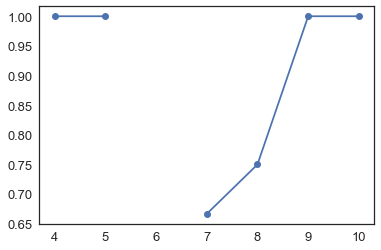

In [44]:
plt.plot("Week", "Value", data=top3numbers[top3numbers.Metric == "PRECISION"], linestyle='-', marker='o')
plt.show()



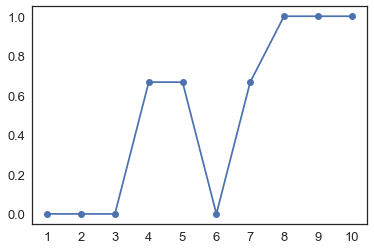

In [45]:
plt.plot("Week", "Value", data=top3numbers[top3numbers.Metric == "RECALL"], linestyle='-', marker='o')
plt.show()

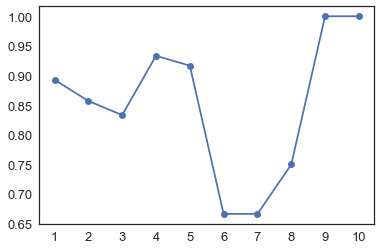

In [46]:
plt.plot("Week", "Value", data=top3numbers[top3numbers.Metric == "ACCURACY"], linestyle='-', marker='o')
plt.show()

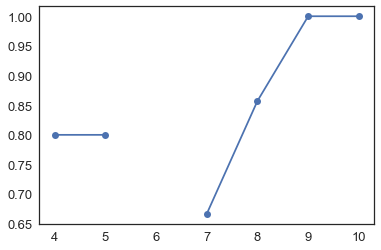

In [47]:
plt.plot("Week", "Value", data=top3numbers[top3numbers.Metric == "F1"], linestyle='-', marker='o')
plt.show()

In [50]:
ette_all[ette_all.TOP_THREE == 1][['SEASON', 'NAME', 'ELIMINATION-5', 'ELIMINATION-6', 'ELIMINATION-7', 'ELIMINATION-8', 'ELIMINATION-9', 'ELIMINATION-10']]

,SEASON,NAME,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,ELIMINATION-8,ELIMINATION-9,ELIMINATION-10
0,14,Garrett Yrigoyen,NaN,NaN,R,NaN,NaN,W
1,14,Blake Horstmann,R,NaN,R,NaN,NaN,E
2,14,Jason Tartick,NaN,R,R,NaN,ED,NaN
28,13,Bryan Abasolo,R,NaN,R,NaN,NaN,W
29,13,Peter Kraus,NaN,R,R,NaN,NaN,E
30,13,Eric Bigger,NaN,R,R,NaN,E,NaN
59,12,Jordan Rodgers,R,NaN,NaN,NaN,NaN,W
60,12,Robby Hayes,R,NaN,R,NaN,NaN,E
61,12,Chase McNary,NaN,R,NaN,NaN,ED,NaN
85,11,Shawn Booth,R,NaN,NaN,NaN,W,NaN
